# TASK 1: Prediction Using Supervised ML

## Step 1: Reading and Understanding the Data

1. Importing data using the pandas library
2. Understanding the structure of the data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

In [3]:
# Read the data , and view some sample records

df = pd.read_csv("http://bit.ly/w-data")
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Understanding various aspects of the dataframe

In [4]:
df.shape

(25, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Step 2: Visualising the Data

In [7]:
#importing libraries

import matplotlib.pyplot as plt 
import seaborn as sns

Plotting a pairplot

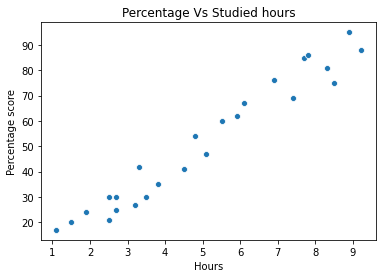

In [8]:
sns.scatterplot( df['Hours'],df['Scores'])
plt.title('Percentage Vs Studied hours')
plt.ylabel('Percentage score')
plt.show()

## Step 3: Performing Simple Linear Regression

Equation of Simple Linear Regression  is

$y=mx+c$

where $y$ is the response variable, $c$ is the intercept and $m$ is the coefficoent of feature variable.
In our case:

$y = c + m \times Hours$


In [9]:
#Assigning feature variable [Hours]to x and reponse variable[Scores] to y

X = df['Hours']
y = df['Scores']

### Test- Train Split

Dividing the data into train data and test data  as 60, 40

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [11]:
# Let's now take a look at the train dataset
X_train.shape

(20,)

In [12]:
y_train.head()

19    69
23    76
21    54
6     88
12    41
Name: Scores, dtype: int64

In [13]:
X_train=X_train[:,np.newaxis]
y_train=y_train[:,np.newaxis]
X_test=X_test[:,np.newaxis]
y_test=y_test[:,np.newaxis]

In [14]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object using StandardScaler()
scaler = StandardScaler()
#'Fit' and transform the train set; and transform using the fit on the test set later
X_train_scaled = scaler.fit_transform(X_train)
y_train_scaled = scaler.fit_transform(y_train)

#### Building a Linear Model

Building a linear Model using `sklearn` library

In [15]:
#importing library

from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [16]:
# Fit the regression line 
lr.fit(X_train,y_train)

LinearRegression()

In [17]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
print("Intercept = ",lr.intercept_)
print("Coefficient = ",lr.coef_)

Intercept =  [1.98942311]
Coefficient =  [[9.83544438]]


In [18]:
# Making Predictions
y_pred=lr.predict(X_test)

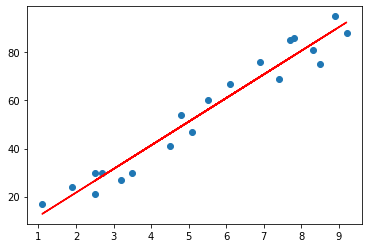

In [19]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 1.989 + 9.835*X_train,'r')
plt.show()

In [20]:
#checkin mean square error and R square

from sklearn.metrics import mean_squared_error, r2_score
mse=mean_squared_error(y_test,y_pred)
r_squared=r2_score(y_test,y_pred)

print('Mean Squared Error',mse)
print('r_squared_value',r_squared)

Mean Squared Error 20.641456931253995
r_squared_value 0.9050356232459791


####  What is the predicted score if the student studies for 9.25 hrs/day ?

In [21]:
hr=9.25
sc=lr.predict([[hr]])
print("Predicted Score : ",sc[0] )

Predicted Score :  [92.96728365]
